# Phase 3：Data Analysis

In [19]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


import re

# data visualization
from tabulate import tabulate
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# change text color
import colorama
from colorama import Fore, Style

# IPython
from IPython.display import IFrame

## Data Processing

Time series:

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

cross-section data:

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

In [42]:
from getdata import GET_csse_covid_19_daily_reports,GET_csse_covid_19_time_series,GET_shanghai_data

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(plot=True)  # 这里包含近10天的上海无症状新增趋势！

正在读取【横截面】数据......


KeyboardInterrupt: 

In [ ]:
from data_processing import ts_process_CHINA,ts_process_US,daily_process

In [ ]:
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = ts_process_CHINA(ts_confirmed_global,clip=False)
ts_deaths_CHINA_incre, _, _ = ts_process_CHINA(ts_deaths_global,clip=False)
ts_recovered_CHINA_incre, _, _ = ts_process_CHINA(ts_recovered_global,clip=False)

In [ ]:
ts_confirmed_US_incre,loc_data_us,sorted_state = ts_process_US(ts_confirmed_us,clip=False)
ts_deaths_US_incre,_,_,population = ts_process_US(ts_deaths_us,death = True,clip=False)

In [6]:
latest_data_CHINA = daily_process(latest_data_global, country = 'China')
prev_data_CHINA = daily_process(prev_data_global, country = 'China')
latest_data_US = daily_process(latest_data_us, country = 'US')
prev_data_US = daily_process(prev_data_us, country = 'US')

### Data quality analysis

Becasue of `clip=False`，Explain that we consider the situation of **negative growth**, let's see if negative growth has occurred!

In [7]:
neg_incre_date_CHINA = []
neg_incre_province_CHINA = []
neg_incre_number_CHINA = []
for r,c in sorted(zip(np.where(ts_confirmed_CHINA_incre<0)[0],np.where(ts_confirmed_CHINA_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_CHINA.append(str(ts_confirmed_CHINA_incre.index[r]))
    neg_incre_province_CHINA.append(ts_confirmed_CHINA_incre.columns[c])
    neg_incre_number_CHINA.append(ts_confirmed_CHINA_incre.iloc[r,c])

In [21]:
print(tabulate(sorted(zip(neg_incre_date_CHINA,
                   neg_incre_province_CHINA,
                   neg_incre_number_CHINA),key = lambda x: abs(x[2]),reverse = True),
              headers = ['negative growth date','location','numbers'],tablefmt = 'pretty'))

+----------------------+--------------+---------+
| negative growth date |   location   | numbers |
+----------------------+--------------+---------+
| 2022-04-20 00:00:00  |   Shanghai   |  -589   |
| 2023-01-09 00:00:00  |    Macau     |  -265   |
| 2023-01-08 00:00:00  |   Liaoning   |  -244   |
| 2022-12-17 00:00:00  |    Fujian    |   -73   |
| 2022-12-17 00:00:00  |   Jiangsu    |   -27   |
| 2021-10-09 00:00:00  |  Hong Kong   |   -23   |
| 2022-04-15 00:00:00  |    Yunnan    |   -12   |
| 2022-12-17 00:00:00  |    Tibet     |   -7    |
| 2020-06-03 00:00:00  |   Jiangxi    |   -5    |
| 2021-10-14 00:00:00  | Heilongjiang |   -4    |
| 2022-12-17 00:00:00  |    Jilin     |   -1    |
| 2022-12-17 00:00:00  |    Hubei     |   -1    |
| 2022-02-09 00:00:00  |   Liaoning   |   -1    |
| 2021-10-14 00:00:00  |    Hebei     |   -1    |
| 2021-09-03 00:00:00  |  Hong Kong   |   -1    |
| 2021-06-28 00:00:00  |   Beijing    |   -1    |
| 2020-10-25 00:00:00  |   Shaanxi    |   -1    |


It can be seen that on October 9, 2021, Hong Kong experienced the largest negative growth, which means that the number of cured people exceeded the number of infected people by 23. Then let's look at America again!

In [22]:
neg_incre_date_US = []
neg_incre_province_US = []
neg_incre_number_US = []
for r,c in sorted(zip(np.where(ts_confirmed_US_incre<0)[0],np.where(ts_confirmed_US_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_US.append(str(ts_confirmed_US_incre.index[r]))
    neg_incre_province_US.append(ts_confirmed_US_incre.columns[c])
    neg_incre_number_US.append(ts_confirmed_US_incre.iloc[r,c])
    
    
print(tabulate(sorted(zip(neg_incre_date_US,
                   neg_incre_province_US,
                   neg_incre_number_US),key = lambda x: abs(x[2]),reverse = True),
              headers = ['negative growth date','location','numbers'],tablefmt = 'pretty'))

+----------------------+----------------------+---------+
| negative growth date |       location       | numbers |
+----------------------+----------------------+---------+
| 2022-08-17 00:00:00  |       Florida        | -27000  |
| 2021-04-26 00:00:00  |      New Jersey      |  -9005  |
| 2022-01-26 00:00:00  |       Alabama        |  -8780  |
| 2022-10-26 00:00:00  |       Nebraska       |  -8099  |
| 2021-04-17 00:00:00  |       Missouri       |  -7698  |
| 2021-03-11 00:00:00  |       Missouri       |  -4354  |
| 2022-02-08 00:00:00  |     Pennsylvania     |  -4116  |
| 2021-06-29 00:00:00  |      California      |  -3940  |
| 2022-05-11 00:00:00  |       Nebraska       |  -3764  |
| 2023-01-17 00:00:00  |       Colorado       |  -3133  |
| 2022-05-05 00:00:00  |    South Carolina    |  -3073  |
| 2022-08-30 00:00:00  |        Idaho         |  -2439  |
| 2022-05-04 00:00:00  |      Washington      |  -2220  |
| 2022-01-18 00:00:00  |        Nevada        |  -2153  |
| 2020-03-29 0

There are many cases of negative growth in the United States, especially in recent states such as Texas, New Jersey, and Missouri, all of which have experienced substantial negative growth, indicating that these states have responded very well to the invasion of Omicron. !

In [26]:
def negincre_report(ts_data, sort_by = 0):
    """
    ts_data: time seris data
    sort_by: 0 ==> date
             1 ==> place 
             2 ==> number
    """
    neg_incre_date = []
    neg_incre_province = []
    neg_incre_number = []
    for r,c in sorted(zip(np.where(ts_data<0)[0],np.where(ts_data<0)[1]),key = lambda x: x[0],reverse=True):
        neg_incre_date.append(str(ts_data.index[r]))
        neg_incre_province.append(ts_data.columns[c])
        neg_incre_number.append(ts_data.iloc[r,c])

    recent_date = ts_data.index[np.where(ts_data.sum(axis=1)<0)].format()
    if len(recent_date) != 0:
        recent_date = recent_date[0]
    else:
        recent_date = '无'
        
    print('*'*20 +  'INFO' +  '*'*20)
    print(f"National negative growth date：{recent_date}")
    
    print('*'*20 +  'REPORT' +  '*'*20)
    print(tabulate(sorted(zip(neg_incre_date,
                       neg_incre_province,
                       neg_incre_number),key = lambda x: abs(x[sort_by]) if sort_by == 2 else x[sort_by],reverse = True),
                  headers = ['negative growth date','location','numbers'],tablefmt = 'pretty'))



It is very strange that the number of new deaths can also be negative.

In [27]:
negincre_report(ts_confirmed_CHINA_incre,sort_by=2)


********************INFO********************
National negative growth date：2020-06-03
********************REPORT********************
+----------------------+--------------+---------+
| negative growth date |   location   | numbers |
+----------------------+--------------+---------+
| 2022-04-20 00:00:00  |   Shanghai   |  -589   |
| 2023-01-09 00:00:00  |    Macau     |  -265   |
| 2023-01-08 00:00:00  |   Liaoning   |  -244   |
| 2022-12-17 00:00:00  |    Fujian    |   -73   |
| 2022-12-17 00:00:00  |   Jiangsu    |   -27   |
| 2021-10-09 00:00:00  |  Hong Kong   |   -23   |
| 2022-04-15 00:00:00  |    Yunnan    |   -12   |
| 2022-12-17 00:00:00  |    Tibet     |   -7    |
| 2020-06-03 00:00:00  |   Jiangxi    |   -5    |
| 2021-10-14 00:00:00  | Heilongjiang |   -4    |
| 2022-12-17 00:00:00  |    Jilin     |   -1    |
| 2022-12-17 00:00:00  |    Hubei     |   -1    |
| 2022-02-09 00:00:00  |   Liaoning   |   -1    |
| 2021-10-14 00:00:00  |    Hebei     |   -1    |
| 2021-09-03 00:0

In [28]:
def dataQC(data):
    # basic info
    print(f"total number of rows：{Fore.RED}{data.shape[0]}{Style.RESET_ALL}")
    print(f"total number of columns：{Fore.RED}{data.shape[1]}{Style.RESET_ALL}")
    print(f"total number of elements：{data.size}")
    print('-'*50+ f"{Fore.RED}INFO{Style.RESET_ALL}"  + '-'*50)
    print('【basic information】')
    data.info()

In [29]:
dataQC(latest_data_CHINA)

total number of rows：33
total number of columns：6
total number of elements：198
--------------------------------------------------INFO--------------------------------------------------
【basic information】
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Anhui to Zhejiang
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province_State       33 non-null     object 
 1   Last_Update          33 non-null     object 
 2   Confirmed            33 non-null     int64  
 3   Deaths               33 non-null     int64  
 4   Incident_Rate        33 non-null     float64
 5   Case_Fatality_Ratio  33 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ KB


### Data visualization

Now, let's plot the time series trend of the epidemic in each province of China.

And add the 7-day moving average and 30-day moving average curves.

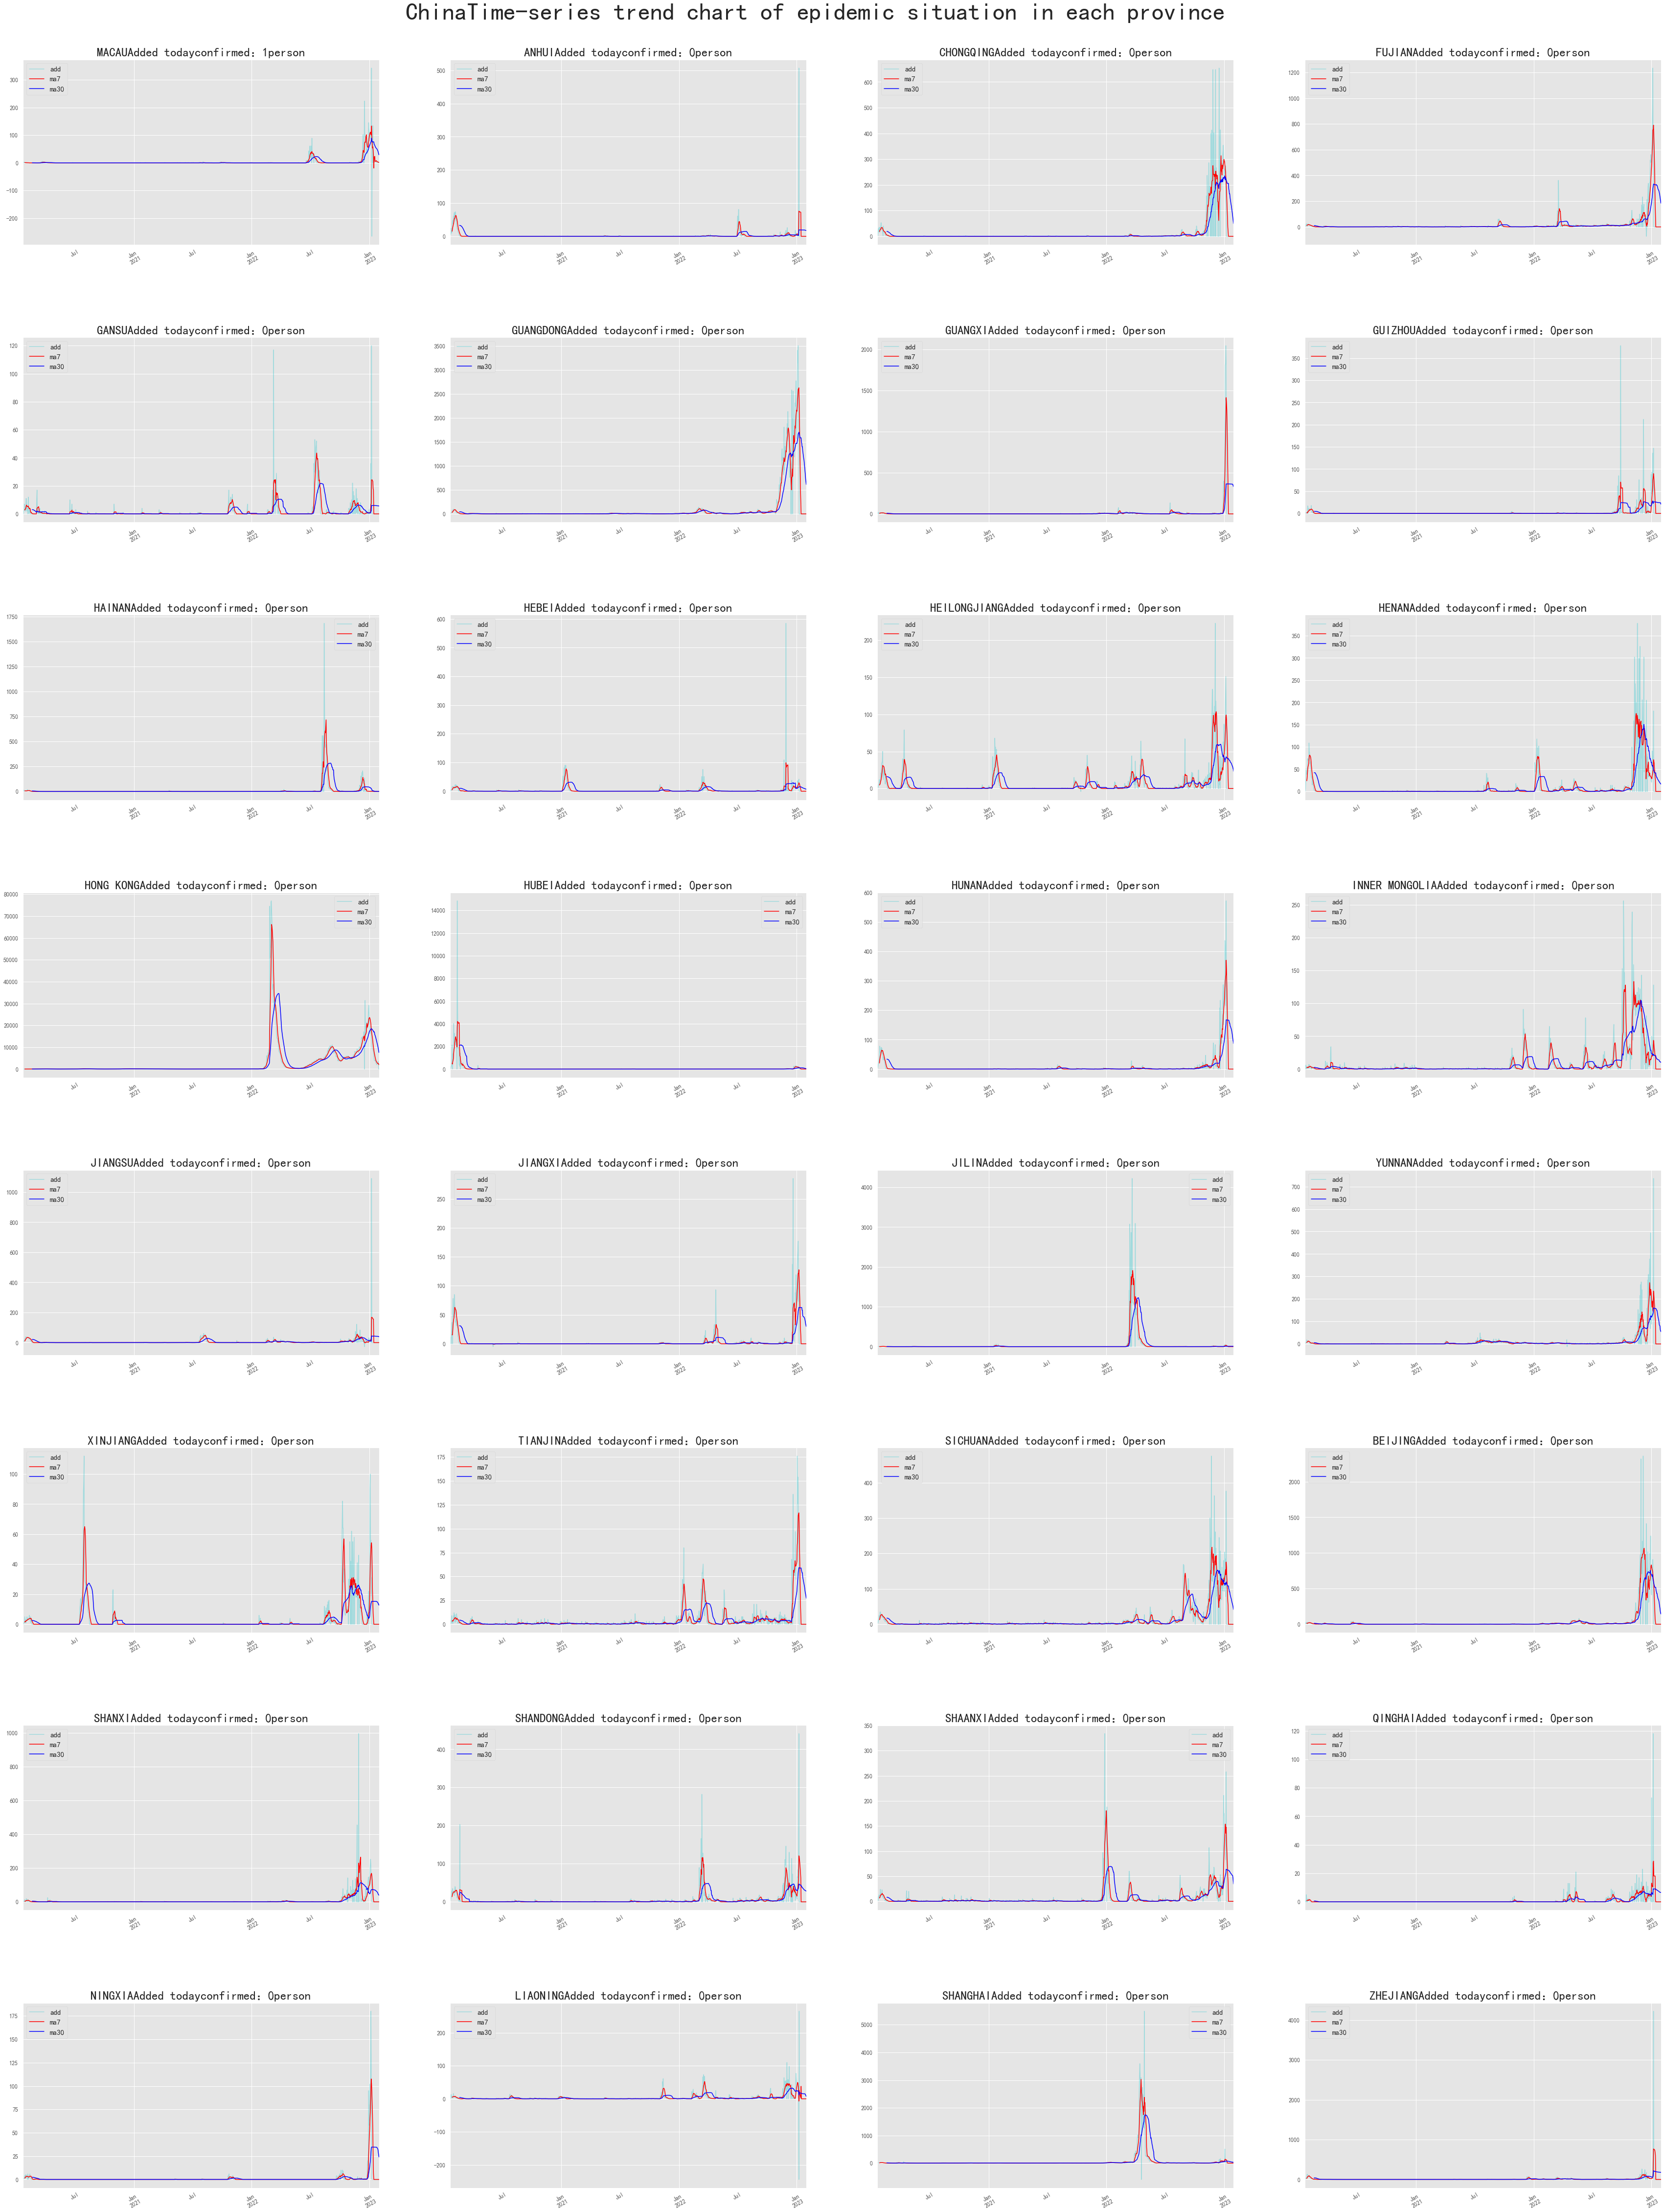

In [31]:
country = 'China'
ma = [7,30]
method = 'New case'
kind = 'confirmed'



data_copy = ts_confirmed_CHINA_incre.copy()
data_copy = data_copy.drop(['Tibet'],axis=1).sort_values(axis=1, by =data_copy.index[-1],ascending=False)
plt.style.use('ggplot')
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15*4, 10*8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(f"{country}Time-series trend chart of epidemic situation in each province", fontsize=50, y = 0.9)
for province,ax in zip(data_copy.columns, axs.ravel()):
    data_copy[province].plot(ax=ax,rot = 30, fontsize = 12,alpha = .3, label = method, color = '#06c3cc')
    data_copy[province].rolling(ma[0]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[0]}',color = 'red')
    data_copy[province].rolling(ma[1]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[1]}',color = 'blue')
    ax.set_title(f"{province.upper()}Added today{kind}：{int(data_copy[province].tail(1))}person",fontsize = 25)
    ax.legend(fontsize = 15)
    ax.set_xlabel("")
plt.show()

Now, we focus on a specific province or state, and we focus on the data of Shanghai. At this time, it is best to use plotly to achieve interactive visualization!

In [32]:
data_copy1 = ts_confirmed_US_incre

specify = 'New York'
idx = data_copy1.index
ser = data_copy1[specify]
layout_title = specify.upper()
kind = 'New case'
method = 'confirmed'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}numbers',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}day moving average',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}day moving average',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': 'Date'}
y_axis_config = {'title': f'{kind}number（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】recent date【{kind}】Number Time Series Line Chart（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

In [37]:
data_copy1 = ts_confirmed_CHINA_incre

specify = 'Shanghai'
idx = data_copy1.index
ser = data_copy1[specify]
layout_title = specify.upper()
kind = 'confirmed'
method = 'new case'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}numbers',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}day moving average',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}day moving average',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': 'Date'}
y_axis_config = {'title': f'{kind}number（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】recent date【{kind}】Number Time Series Line Chart（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

Let’s take a look at the development trend and important nodes of the entire epidemic in China since the epidemic

In [38]:
data_copy1 = ts_confirmed_CHINA_incre

specify = 'China'
idx = data_copy1.index
ser = data_copy1.sum(axis=1)
layout_title = specify.upper()
kind = 'confirmed'
method = 'new case'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}number',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}day moving average',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}day moving average',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': 'date'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】recent date【{kind}】Number Time Series Line Chart（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

From the picture above, it seems that around February and March 22, there was a wave of sharp growth. It was because Hong Kong was disobedient and had to behave badly. We learned from the British and directly played ourselves to pieces. This curve Really scary.

So, let's exclude Hong Kong first and see what the trend is in the mainland.

In [39]:
data_copy1 = ts_confirmed_CHINA_incre

specify = 'mainland China'
idx = data_copy1.index
ser = data_copy1.drop('Hong Kong',axis=1).sum(axis=1)
layout_title = specify.upper()
kind = 'confirmed'
method = 'new case'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}number',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}day moving average',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}day moving average',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)



plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': 'date'}
y_axis_config = {'title': f'{kind}number（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】recent date【{kind}】Number Time Series Line Chart（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

This curve is more reasonable. First of all, Wuhan broke out in early 2020. On February 13, there were more than 15k new confirmed cases in a single day, which is terrible! Let's zoom to see the details!

However, on the 14th, the new increase in a single day was halved, only more than 6k.
It can be seen that this wave of surge is abnormal, with fast up and down, which shows that the strain at the beginning is extremely contagious, and we have also controlled it very well. The number of people is controlled within a controllable range (estimated to be the reason for the closure of the city).

In March, our daily increase dropped to a few hundred, and finally to dozens. The first stage of the anti-epidemic ended, and everyone started a protracted war. Until April 17, there was a wave of small rises. After checking, it was Hubei There were 325 new cases that day, but the news did not report that day, emphasizing that the rebound occurred in Heilongjiang. Indeed, the reported data is basically consistent with the data we got. There were indeed 10 new cases in Heilongjiang Province.

Check out the news of the day

(When you find an abnormal situation, you need to find more information to support or overturn the information we obtained from the data. You must know that all our analysis decisions come from the data itself, so if there is a problem with the data, no matter how you analyze it In vain!)

It can be seen that until the beginning of 22, China has been maintaining very well, with a basic daily increase of single digits, and has not been seriously affected by the more contagious delta strain.

> Delta (Delta), is a mutant strain of the new coronavirus. It was first discovered in India in October 2020. In May 2021, the World Health Organization named the variant strain B.1.617.2 of the new coronavirus first discovered in India as the "Delta" variant.

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/shanghai_covid.png?raw=true width='800' />
</div>

In [24]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/8qB9HRwFTo0")

Then let's see if the data of the beautiful country is as beautiful as China

In [40]:
data_copy1 = ts_confirmed_US_incre

specify = 'USA'
idx = data_copy1.index
ser = data_copy1.sum(axis=1)
layout_title = specify.upper()
kind = 'confirmed'
method = 'new case'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}number',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}day moving average',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}day moving average',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': 'date'}
y_axis_config = {'title': f'{kind}number（{method.upper()}）'}

my_layout = Layout(title=f"【{layout_title}】recent date【{kind}】Number Time Series Line Chart（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)

offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

<div class="alert alert-block alert-success"><b>Step 7 Plot US TS Deaths Trends</b>
    
请尝试画出美国死亡时序趋势图吧！
</div>

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/us_covid.png?raw=true width='800' />
</div>

However, in recent days, starting from mid-March 2022, residential areas in Shanghai have begun to be controlled one after another. In just 10 days, Shanghai has completely fallen.

Let me introduce to you the community management model of the epidemic in Shanghai:

1. Sealed area

The residential areas of cases and asymptomatic infected persons and the surrounding areas with frequent activities can be classified as closed areas.

From 2 days before the onset of the case or from 2 days before the positive test of asymptomatic infected persons to before the isolation management, such as the possibility of transmission to people in areas such as workplaces and activities is relatively high, and it is difficult to determine close contacts and close contacts If it is relatively large, the relevant area can also be classified as a closed area.

The closed control area can be accurately divided into residential areas (natural village groups), buildings, units, etc., and "area closed, stay at home, and door-to-door service" is implemented.

2. Control area

From 2 days before the onset of the case or from 2 days before the positive test of asymptomatic infected persons to before isolation management, if there is a certain risk of transmission to people in areas such as workplaces and activities, and it is difficult to determine the close contacts of close contacts and close contacts , to divide the relevant area into a control area.

The control area can be accurately divided into residential areas (natural village groups), buildings, units, etc., and "people do not leave the area and gatherings are strictly prohibited".

If a positive nucleic acid test is found in the controlled area, it will immediately be transferred to a closed area.

3. Defense area

The closed control area in the county (district) and the area outside the control area are prevention areas.

Implement "strengthening social control and strictly restricting the gathering of people".

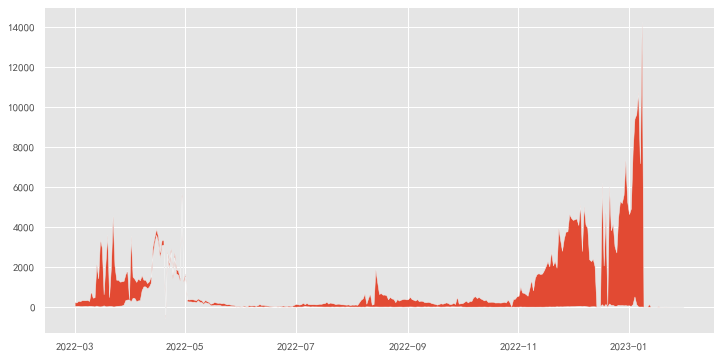

In [41]:
data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index>='2022-03-01']

specify = 'Mainland China vs. Shanghai'
idx = data_copy1.index
ser = data_copy1.drop('Hong Kong',axis=1).sum(axis=1)
layout_title = specify.upper()
kind = 'confirmed'
method = 'new case'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}number',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}day moving average',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}day moving average',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)

trace3 = go.Scatter(
    x = idx,
    y = data_copy1['Shanghai'],
    mode = 'lines+markers',
    name = 'New cases in Shanghai',
    opacity = .8,
    line=dict(color="#f3832c",width = 1.4),
    marker = dict(color = '#d90013',size = 3.2)
)


plotdata = [trace,trace1,trace2,trace3]

'''启动绘图'''

x_axis_config = {'title': 'Date'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}

my_layout = Layout(title=f"【{layout_title}】recent date【{kind}】Number Time Series Line Chart（{method.upper()}）March 2022 - now",
                   xaxis=x_axis_config, yaxis=y_axis_config)

offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')





data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index>='2022-03-01']
plt.figure(figsize = [12,6])
plt.fill_between(x = idx, 
                 y1 = data_copy1.drop('Hong Kong',axis=1).sum(axis=1),
                 y2 = data_copy1['Shanghai'],animated=True)

It can be seen that the number of new cases in Shanghai and the whole country is getting closer and closer, especially since April, basically 80% to 90% of the new numbers are contributed by Shanghai!

It reached its peak on April 15th, and no breakthrough occurred. I hope to usher in a real inflection point!